In [55]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [48]:
iris = pd.DataFrame(X,y)
iris['target'] = iris.index
iris.index = range(len(iris))
iris.head(5)

,0,1,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


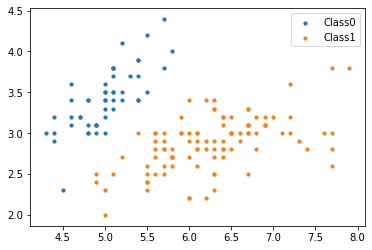

In [59]:
class0 = iris.loc[y==0]
class1 = iris.loc[y==1]

plt.scatter(class0.iloc[:,0],class0.iloc[:,1] , s = 10, label = 'Class0')
plt.scatter(class1.iloc[:,0],class1.iloc[:,1] , s = 10, label = 'Class1')
plt.legend()
plt.show()

##### Implement Gradient Descent on random data

Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


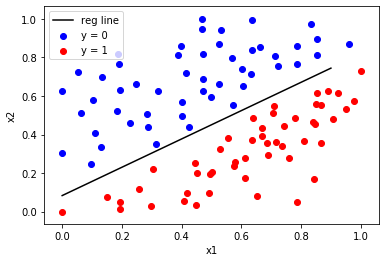

In [105]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 


def loadCSV(filename): 
	''' 
	function to load dataset 
	'''
	with open(filename,"r") as csvfile: 
		lines = csv.reader(csvfile) 
		dataset = list(lines) 
		for i in range(len(dataset)): 
			dataset[i] = [float(x) for x in dataset[i]]	 
	return np.array(dataset) 


def normalize(X): 
	''' 
	function to normalize feature matrix, X 
	'''
	mins = np.min(X, axis = 0) 
	maxs = np.max(X, axis = 0) 
	rng = maxs - mins 
	norm_X = 1 - ((maxs - X)/rng) 
	return norm_X 


def logistic_func(beta, X): 
	''' 
	logistic(sigmoid) function 
    h(x) = 1/(1+e^(-bx))
	'''
	return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 


def log_gradient(beta, X, y): 
	''' 
	logistic gradient function 
	'''
	first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
	final_calc = np.dot(first_calc.T, X) 
	return final_calc 


def cost_func(beta, X, y): 
	''' 
	cost function, J 
	'''
	log_func_v = logistic_func(beta, X) 
	y = np.squeeze(y) 
	step1 = y * np.log(log_func_v) 
	step2 = (1 - y) * np.log(1 - log_func_v) 
	final = -step1 - step2 
	return np.mean(final) 


def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
	''' 
	gradient descent function 
	'''
	cost = cost_func(beta, X, y) 
	change_cost = 1
	num_iter = 1
	
	while(change_cost > converge_change): 
		old_cost = cost 
		beta = beta - (lr * log_gradient(beta, X, y)) 
		cost = cost_func(beta, X, y) 
		change_cost = old_cost - cost 
		num_iter += 1
	
	return beta, num_iter 


def pred_values(beta, X): 
	''' 
	function to predict labels 
	'''
	pred_prob = logistic_func(beta, X) 
	pred_value = np.where(pred_prob >= .5, 1, 0) 
	return np.squeeze(pred_value) 


def plot_reg(X, y, beta): 
	''' 
	function to plot decision boundary 
	'''
	# labelled observations 
	x_0 = X[np.where(y == 0.0)] 
	x_1 = X[np.where(y == 1.0)] 
	
	# plotting points with diff color for diff label 
	plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
	plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
	
	# plotting decision boundary 
	x1 = np.arange(0, 1, 0.1) 
	x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
	plt.plot(x1, x2, c='k', label='reg line') 

	plt.xlabel('x1') 
	plt.ylabel('x2') 
	plt.legend() 
	plt.show() 
	

	
if __name__ == "__main__": 
	# load the dataset 
	dataset = loadCSV('logit_dataset.csv') 

    # normalizing feature matrix 
	X = normalize(dataset[:, :-1]) 
	
	# stacking columns wth all ones in feature matrix 
	X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 

	# response vector 
	y = dataset[:, -1] 

	# initial beta values 
	beta = np.matrix(np.zeros(X.shape[1])) 

	# beta values after running gradient descent 
	beta, num_iter = grad_desc(X, y, beta) 

	# estimated beta values and number of iterations 
	print("Estimated regression coefficients:", beta) 
	print("No. of iterations:", num_iter) 

	# predicted labels 
	y_pred = pred_values(beta, X) 
	
	# number of correctly predicted labels 
	print("Correctly predicted labels:", np.sum(y == y_pred)) 
	
	# plotting regression line 
	plot_reg(X, y, beta) 


In [138]:
X = normalize(dataset[:, :-1]) 

# stacking columns wth all ones in feature matrix 
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 

# response vector 
y = dataset[:, -1] 

# initial beta values 
beta = np.matrix(np.zeros(X.shape[1])) 

In [139]:
log_gradient(beta, X, y)

matrix([[ 0.        , -5.06306958,  9.15965858]])

In [155]:
cost_func(beta, X, y)

69.31471805599452

In [152]:
y = np.squeeze(y) 

In [153]:
y *np.log(logistic_func(beta, X))

matrix([[-34.65735903]])

In [154]:
(1 - y) * np.log(1 - logistic_func(beta, X))

matrix([[-34.65735903]])

In [161]:
normalize([3])#,5,4])


/home/jismysebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


array([nan])

####    SKlearn implementation

In [162]:
from sklearn import datasets, linear_model, metrics 
   
# load the digit dataset 
digits = datasets.load_digits() 
   
# defining feature matrix(X) and response vector(y) 
X = digits.data 
y = digits.target 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
   
# create logistic regression object 
reg = linear_model.LogisticRegression() 
   
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = reg.predict(X_test) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 


Logistic Regression model accuracy(in %): 95.6884561891516


In [171]:
y.view()

array([0, 1, 2, ..., 8, 9, 8])

In [173]:
beta = np.matrix(np.zeros(X.shape[1])) 
log_gradient(beta, X, y)

matrix([[ 0.00000e+00, -1.93700e+03, -3.70365e+04, -8.46295e+04,
         -8.71925e+04, -4.71030e+04, -1.31470e+04, -1.46950e+03,
         -5.00000e+01, -1.40945e+04, -7.78075e+04, -8.32685e+04,
         -6.77010e+04, -6.10260e+04, -1.71110e+04, -1.11900e+03,
         -1.25000e+01, -1.81605e+04, -7.38640e+04, -4.59390e+04,
         -4.66025e+04, -5.96130e+04, -1.41500e+04, -4.18000e+02,
         -4.00000e+00, -1.49710e+04, -6.75155e+04, -7.16020e+04,
         -7.86055e+04, -6.06870e+04, -1.63305e+04, -1.40000e+01,
          0.00000e+00, -1.27760e+04, -5.47470e+04, -7.36350e+04,
         -7.88350e+04, -6.75975e+04, -2.07520e+04,  0.00000e+00,
         -5.60000e+01, -9.24500e+03, -4.52200e+04, -5.16265e+04,
         -5.42375e+04, -5.95005e+04, -2.61425e+04, -2.69500e+02,
         -3.95000e+01, -4.70100e+03, -4.96830e+04, -6.35410e+04,
         -5.68705e+04, -5.69315e+04, -2.73900e+04, -9.77500e+02,
         -1.50000e+00, -1.74400e+03, -4.00235e+04, -8.62510e+04,
         -7.97105e+04, -4

In [176]:
y_pred = pred_values(beta, X) 

# number of correctly predicted labels 
print("Correctly predicted labels:", np.sum(y == y_pred)) 

Correctly predicted labels: 182


In [189]:
import random

random.randint(1,3)


1

In [204]:
lis = ["data","orcha","plati"]
lis.

TypeError: count() takes exactly one argument (0 given)

'orcha'